In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime, date

In [2]:
#import dataset
with pd.ExcelFile(r'C:\Users\Victordanok\Desktop\Projects\KPMG\KPMG_VI_New_raw_data_update_final.xlsx') as reader:
    trans = pd.read_excel(reader, sheet_name = 'Transactions', header = 1)
    ncl = pd.read_excel(reader, sheet_name = 'NewCustomerList', header = 1)
    cdem = pd.read_excel(reader, sheet_name = 'CustomerDemographic', header = 1)
    cadd = pd.read_excel(reader, sheet_name = 'CustomerAddress', header = 1)

In [3]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [4]:
trans.customer_id.nunique()

3494

In [5]:
cdem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [6]:
cadd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 140.7+ KB


In [7]:
trans.customer_id.nunique()

3494

In [8]:
cdem.customer_id.nunique()

4000

In [9]:
cadd.customer_id.nunique()

3999

### Merging the Datasets

In [10]:
add_dem = pd.merge(cdem, cadd, on = 'customer_id', how = 'left')

In [11]:
customers = pd.merge(add_dem, trans, on = 'customer_id', how = 'left')

In [12]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20504 entries, 0 to 20503
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          20504 non-null  int64         
 1   first_name                           20504 non-null  object        
 2   last_name                            19849 non-null  object        
 3   gender                               20504 non-null  object        
 4   past_3_years_bike_related_purchases  20504 non-null  int64         
 5   DOB                                  20047 non-null  datetime64[ns]
 6   job_title                            18027 non-null  object        
 7   job_industry_category                17180 non-null  object        
 8   wealth_segment                       20504 non-null  object        
 9   deceased_indicator                   20504 non-null  object        
 10  default   

In [13]:
#Create an age column for the dataset

import datetime as dt
today = dt.datetime.today().year #current year
customers['age'] = today - customers.DOB.dt.year

In [14]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20504 entries, 0 to 20503
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          20504 non-null  int64         
 1   first_name                           20504 non-null  object        
 2   last_name                            19849 non-null  object        
 3   gender                               20504 non-null  object        
 4   past_3_years_bike_related_purchases  20504 non-null  int64         
 5   DOB                                  20047 non-null  datetime64[ns]
 6   job_title                            18027 non-null  object        
 7   job_industry_category                17180 non-null  object        
 8   wealth_segment                       20504 non-null  object        
 9   deceased_indicator                   20504 non-null  object        
 10  default   

### Exploratory data analysis

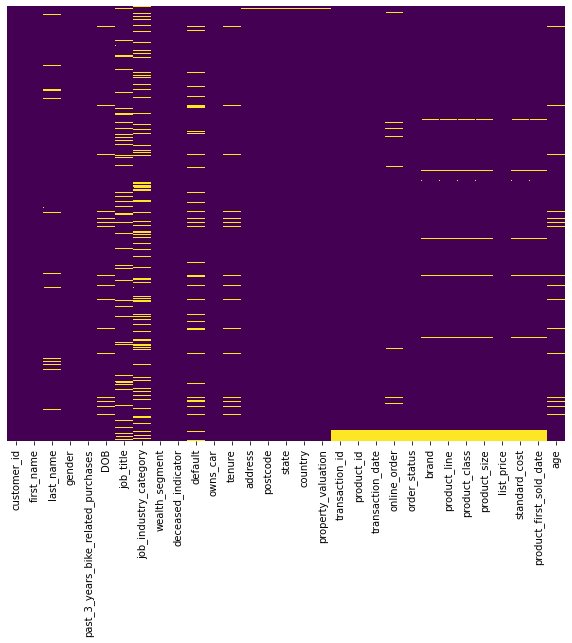

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(customers.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

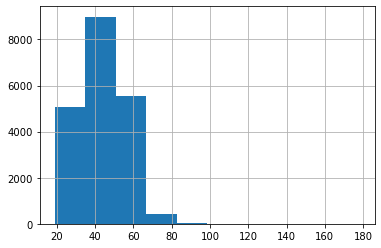

In [16]:
customers.age.hist()

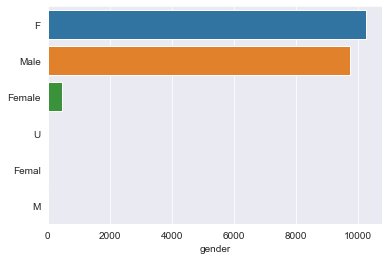

In [17]:
sns.set_style('darkgrid')
sns.barplot(data= customers, y = customers.gender.unique(), x = customers.gender.value_counts())

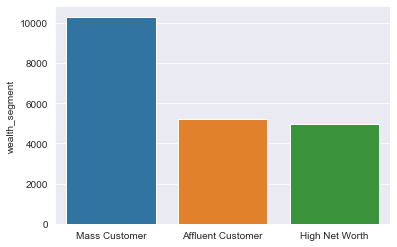

In [18]:
sns.set_style('darkgrid')
sns.barplot(data= customers, x = customers.wealth_segment.unique(), y = customers.wealth_segment.value_counts())

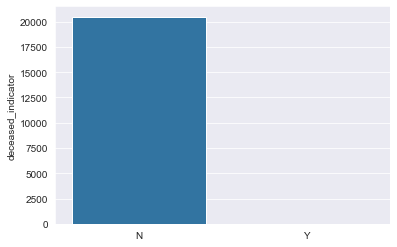

In [19]:
sns.set_style('darkgrid')
sns.barplot(data= customers, x = customers.deceased_indicator.unique(), y = customers.deceased_indicator.value_counts())

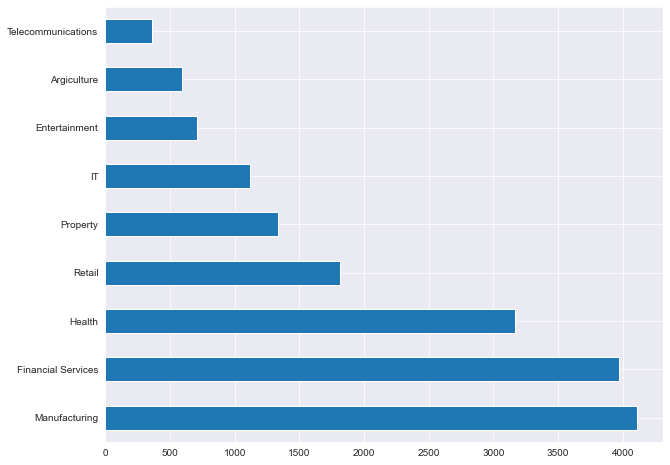

In [20]:
plt.figure(figsize=(10, 8))
customers.job_industry_category.value_counts().plot.barh()

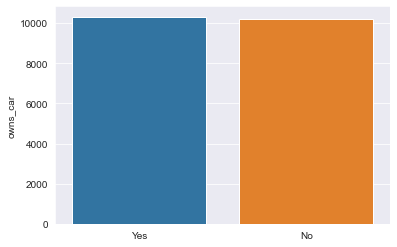

In [21]:
sns.barplot(data= customers, x = customers.owns_car.unique(), y = customers.owns_car.value_counts())

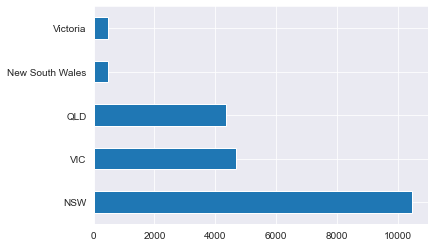

In [22]:
customers.state.value_counts().plot.barh()

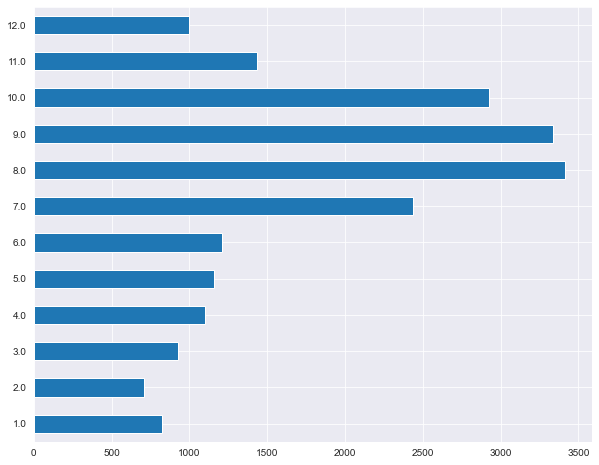

In [23]:
plt.figure(figsize=(10, 8))
customers.property_valuation.value_counts().sort_index().plot.barh()

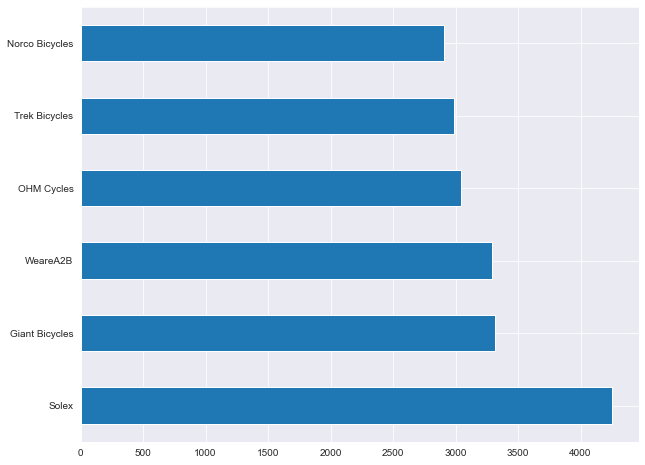

In [24]:
plt.figure(figsize=(10, 8))
customers.brand.value_counts().plot.barh()

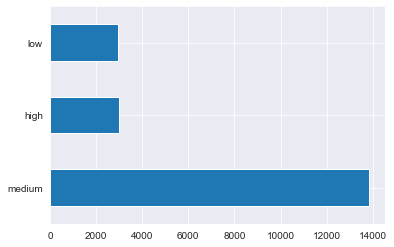

In [25]:
customers.product_class.value_counts().plot.barh()

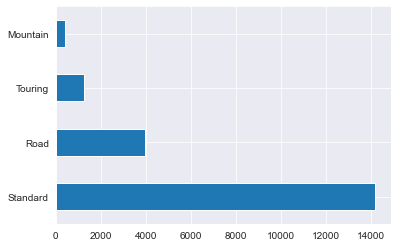

In [26]:
customers.product_line.value_counts().plot.barh()

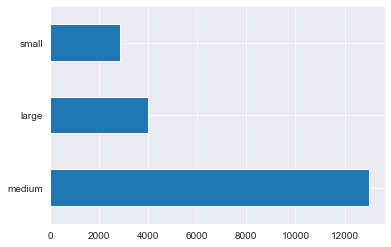

In [27]:
customers.product_size.value_counts().plot.barh()

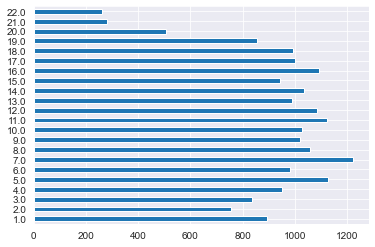

In [28]:
customers.tenure.value_counts().sort_index().plot.barh()

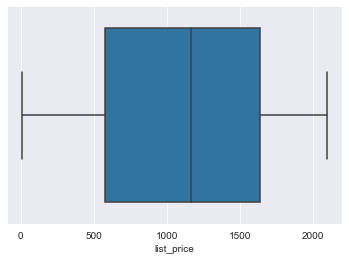

In [29]:
sns.set_style('darkgrid')
sns.boxplot(data = customers, x = customers.list_price)

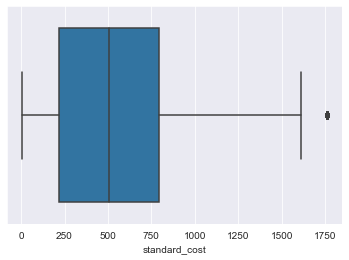

In [30]:
sns.boxplot(data = customers, x = customers.standard_cost)

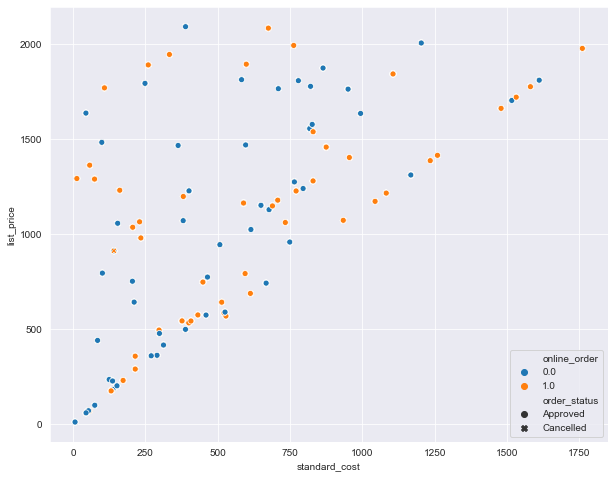

In [31]:
plt.figure(figsize=(10, 8))
sns.set_style('darkgrid')
sns.scatterplot(data = customers, x = 'standard_cost', y = 'list_price', hue = 'online_order', style ='order_status')

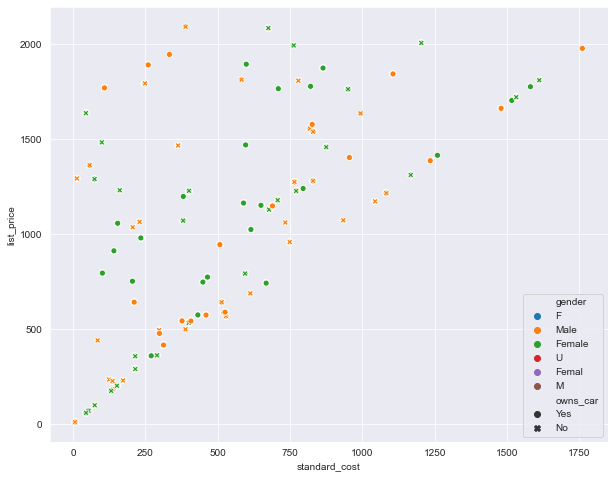

In [32]:
plt.figure(figsize=(10, 8))
sns.set_style('darkgrid')
sns.scatterplot(data = customers, x = 'standard_cost', y = 'list_price', hue = 'gender', style ='owns_car')

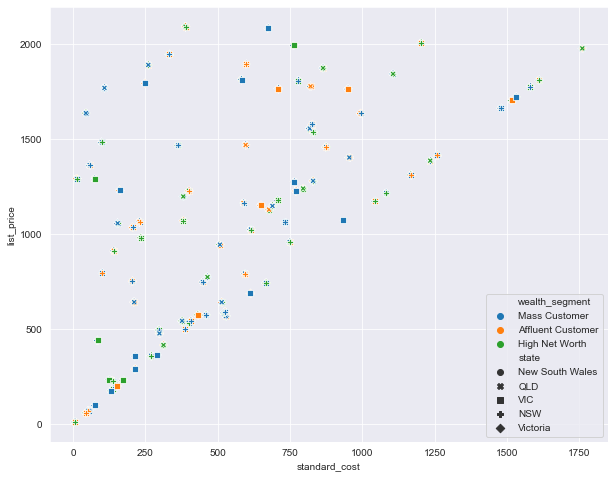

In [33]:
plt.figure(figsize=(10, 8))
sns.set_style('darkgrid')
sns.scatterplot(data = customers, x = 'standard_cost', y = 'list_price', hue = 'wealth_segment', style ='state')

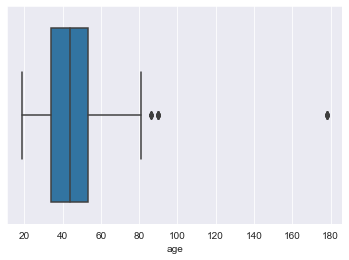

In [34]:
sns.set_style('darkgrid')
sns.boxplot(data = customers, x = customers.age)

In [35]:
customers.brand.unique()

array(['OHM Cycles', 'Solex', 'Trek Bicycles', 'Norco Bicycles',
       'Giant Bicycles', 'WeareA2B', nan], dtype=object)

### Cleaning the customers dataset

In [36]:
customers.duplicated().sum()

0

In [37]:
customers.query('age >= 90')


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,age
200,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,...,1.0,Approved,Solex,Road,medium,small,1703.52,1516.13,40649.0,178.0
201,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,...,0.0,Approved,Norco Bicycles,Standard,low,medium,958.74,748.90,38693.0,178.0
202,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,...,0.0,Approved,Solex,Touring,medium,large,2083.94,675.03,41533.0,178.0
203,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,...,0.0,Approved,WeareA2B,Standard,medium,medium,1231.15,161.60,38216.0,178.0
204,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,...,1.0,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,40779.0,178.0
205,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,...,0.0,Approved,Solex,Standard,medium,medium,1163.89,589.27,42560.0,178.0
206,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,...,0.0,Approved,NaN,NaN,NaN,NaN,1034.17,NaN,NaN,178.0
207,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,...,1.0,Approved,WeareA2B,Road,low,small,1172.78,1043.77,37539.0,178.0
208,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,...,0.0,Approved,WeareA2B,Standard,medium,medium,1807.45,778.69,42145.0,178.0
4200,720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,...,0.0,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,41848.0,90.0


In [38]:
customers.age.replace(to_replace = 178, value = 78, inplace = True)

In [39]:
customers.drop(columns =['default', 'address', 'first_name', 'last_name', 'DOB', 'customer_id'], inplace = True, axis = 1)
customers.drop(columns =['job_industry_category', 'job_title', 'transaction_id', 'transaction_date', 'product_id', 'product_first_sold_date'], inplace = True, axis = 1)

In [40]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20504 entries, 0 to 20503
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   gender                               20504 non-null  object 
 1   past_3_years_bike_related_purchases  20504 non-null  int64  
 2   wealth_segment                       20504 non-null  object 
 3   deceased_indicator                   20504 non-null  object 
 4   owns_car                             20504 non-null  object 
 5   tenure                               20047 non-null  float64
 6   postcode                             20475 non-null  float64
 7   state                                20475 non-null  object 
 8   country                              20475 non-null  object 
 9   property_valuation                   20475 non-null  float64
 10  online_order                         19637 non-null  float64
 11  order_status                

In [41]:
customers.isna().sum()

gender                                   0
past_3_years_bike_related_purchases      0
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                 457
postcode                                29
state                                   29
country                                 29
property_valuation                      29
online_order                           867
order_status                           507
brand                                  704
product_line                           704
product_class                          704
product_size                           704
list_price                             507
standard_cost                          704
age                                    457
dtype: int64

In [42]:
customers['age'].fillna(value = customers.age.mode()[0], inplace = True)
customers['standard_cost'].fillna(value = customers.standard_cost.mode()[0], inplace = True)
customers['list_price'].fillna(value = customers.list_price.mode()[0], inplace = True)
customers['product_size'].fillna(value = customers.product_size.mode()[0], inplace = True)
customers['product_line'].fillna(value = customers.product_line.mode()[0], inplace = True)
customers['product_class'].fillna(value = customers.product_class.mode()[0], inplace = True)
customers['brand'].fillna(value = customers.brand.mode()[0], inplace = True)
customers['order_status'].fillna(value = customers.order_status.mode()[0], inplace = True)
customers['online_order'].fillna(value = customers.online_order.mode()[0], inplace = True)
customers['tenure'].fillna(value = customers.tenure.mode()[0], inplace = True)
customers['property_valuation'].fillna(value = customers.property_valuation.mode()[0], inplace = True)

In [43]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20504 entries, 0 to 20503
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   gender                               20504 non-null  object 
 1   past_3_years_bike_related_purchases  20504 non-null  int64  
 2   wealth_segment                       20504 non-null  object 
 3   deceased_indicator                   20504 non-null  object 
 4   owns_car                             20504 non-null  object 
 5   tenure                               20504 non-null  float64
 6   postcode                             20475 non-null  float64
 7   state                                20475 non-null  object 
 8   country                              20475 non-null  object 
 9   property_valuation                   20504 non-null  float64
 10  online_order                         20504 non-null  float64
 11  order_status                

In [44]:
customers.state.unique()

customers.state.replace(to_replace = ['New South Wales'],value = ['NSW'], inplace = True)
customers.state.replace(to_replace = ['Victoria'],value = ['VIC'], inplace = True)
customers.state.unique()

array(['NSW', nan, 'QLD', 'VIC'], dtype=object)

In [45]:
customers.state.fillna(customers.state.mode()[0], inplace = True)

In [46]:
customers.country.unique()

array(['Australia', nan], dtype=object)

In [47]:
customers.gender.unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

In [48]:
customers.gender.unique()

customers.gender.replace(to_replace = ['M', 'U'],value = ['Male', 'Male'], inplace = True)
customers.gender.replace(to_replace = ['F', 'Femal'],value = ['Female', 'Female'], inplace = True)

In [49]:
customers.drop(columns =['country', 'postcode'], inplace = True, axis = 1)

In [50]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20504 entries, 0 to 20503
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   gender                               20504 non-null  object 
 1   past_3_years_bike_related_purchases  20504 non-null  int64  
 2   wealth_segment                       20504 non-null  object 
 3   deceased_indicator                   20504 non-null  object 
 4   owns_car                             20504 non-null  object 
 5   tenure                               20504 non-null  float64
 6   state                                20504 non-null  object 
 7   property_valuation                   20504 non-null  float64
 8   online_order                         20504 non-null  float64
 9   order_status                         20504 non-null  object 
 10  brand                                20504 non-null  object 
 11  product_line                

In [51]:
customers.head()

,gender,past_3_years_bike_related_purchases,wealth_segment,deceased_indicator,owns_car,tenure,state,property_valuation,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,age
0,Female,93,Mass Customer,N,Yes,11.0,NSW,10.0,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,68.0
1,Female,93,Mass Customer,N,Yes,11.0,NSW,10.0,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,68.0
2,Female,93,Mass Customer,N,Yes,11.0,NSW,10.0,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,68.0
3,Female,93,Mass Customer,N,Yes,11.0,NSW,10.0,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,68.0
4,Female,93,Mass Customer,N,Yes,11.0,NSW,10.0,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,68.0


### EDA of the clean Dataset

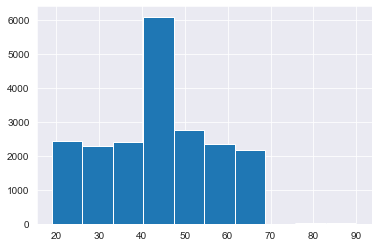

In [52]:
customers.age.hist()

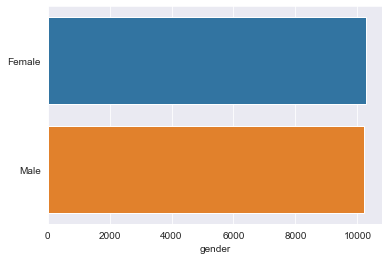

In [53]:
sns.barplot(data= customers, y = customers.gender.unique(), x = customers.gender.value_counts())

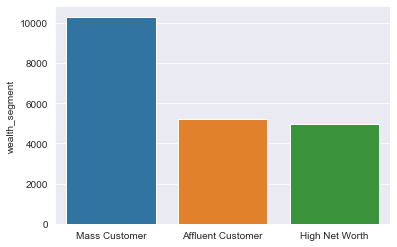

In [54]:
sns.barplot(data= customers, x = customers.wealth_segment.unique(), y = customers.wealth_segment.value_counts())

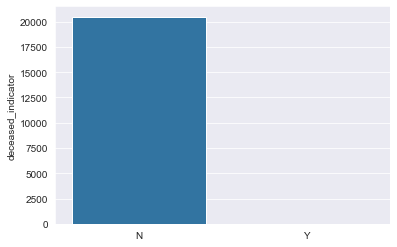

In [55]:
sns.barplot(data= customers, x = customers.deceased_indicator.unique(), y = customers.deceased_indicator.value_counts())

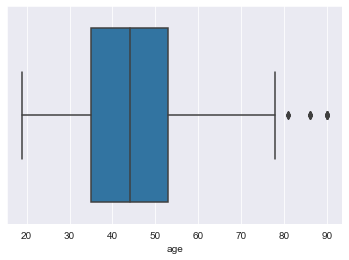

In [56]:
sns.boxplot(data = customers, x = customers.age)

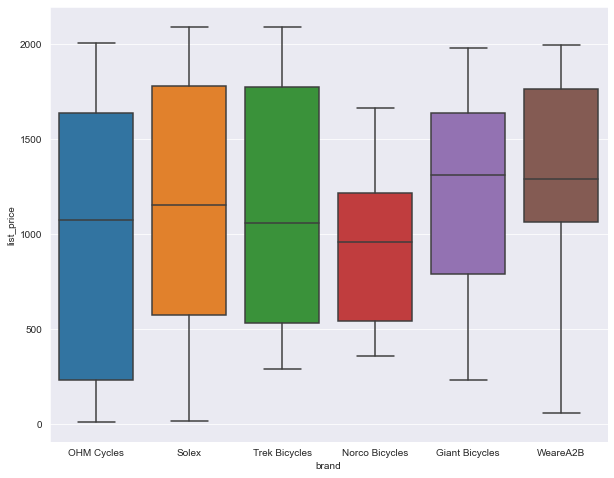

In [57]:
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'brand', y = 'list_price', data = customers)

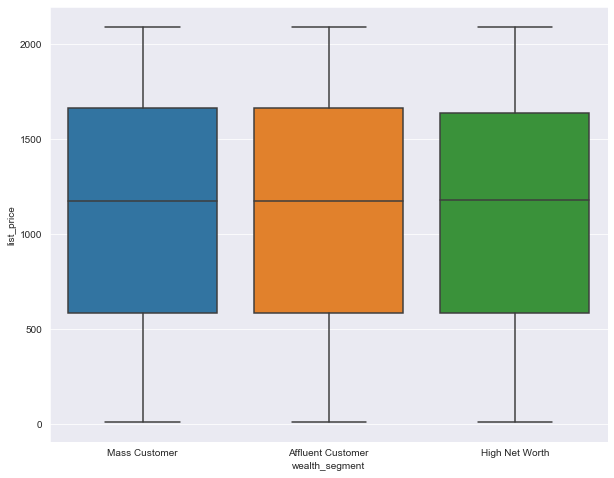

In [58]:
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'wealth_segment', y = 'list_price', data = customers)

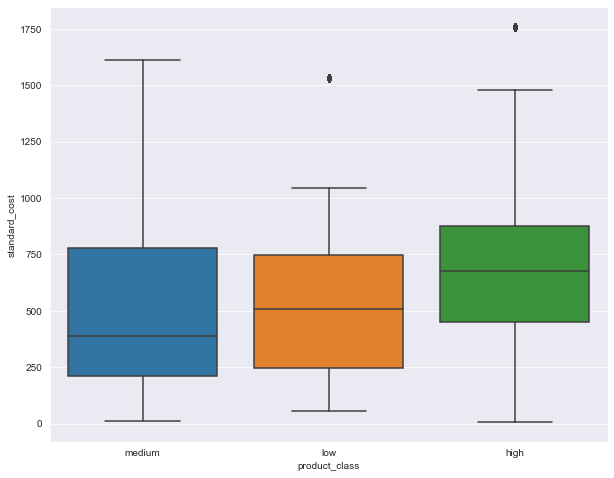

In [59]:
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'product_class', y = 'standard_cost', data = customers)

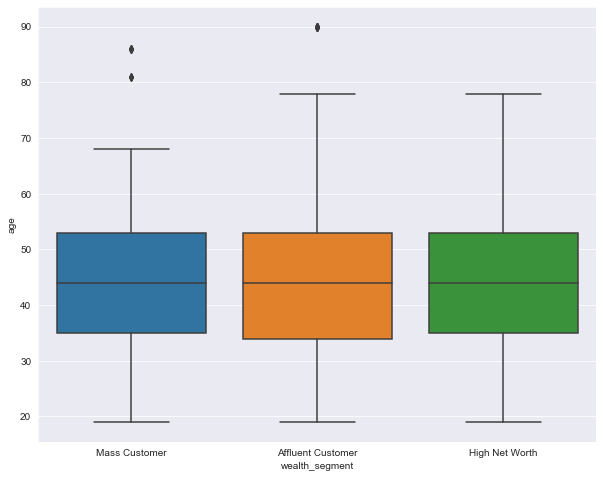

In [60]:
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'wealth_segment', y = 'age', data = customers)

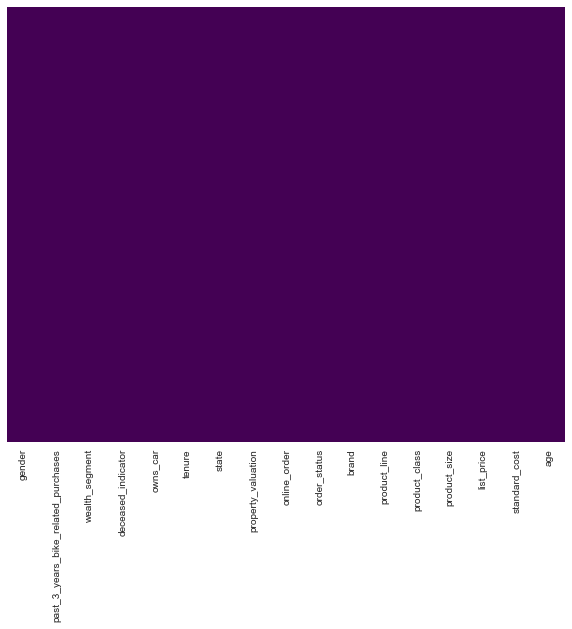

In [61]:
plt.figure(figsize=(10, 8))
sns.heatmap(customers.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [62]:
customers.query('age > 80').count()

gender                                 18
past_3_years_bike_related_purchases    18
wealth_segment                         18
deceased_indicator                     18
owns_car                               18
tenure                                 18
state                                  18
property_valuation                     18
online_order                           18
order_status                           18
brand                                  18
product_line                           18
product_class                          18
product_size                           18
list_price                             18
standard_cost                          18
age                                    18
dtype: int64

In [63]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20504 entries, 0 to 20503
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   gender                               20504 non-null  object 
 1   past_3_years_bike_related_purchases  20504 non-null  int64  
 2   wealth_segment                       20504 non-null  object 
 3   deceased_indicator                   20504 non-null  object 
 4   owns_car                             20504 non-null  object 
 5   tenure                               20504 non-null  float64
 6   state                                20504 non-null  object 
 7   property_valuation                   20504 non-null  float64
 8   online_order                         20504 non-null  float64
 9   order_status                         20504 non-null  object 
 10  brand                                20504 non-null  object 
 11  product_line                

In [64]:
customers.deceased_indicator.value_counts()
customers.query('deceased_indicator == "Y"')

,gender,past_3_years_bike_related_purchases,wealth_segment,deceased_indicator,owns_car,tenure,state,property_valuation,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,age
4414,Female,82,Affluent Customer,Y,Yes,6.0,NSW,3.0,0.0,Approved,OHM Cycles,Standard,medium,medium,795.34,101.58,51.0
4415,Female,82,Affluent Customer,Y,Yes,6.0,NSW,3.0,1.0,Approved,WeareA2B,Touring,medium,medium,1466.68,363.25,51.0
4416,Female,82,Affluent Customer,Y,Yes,6.0,NSW,3.0,1.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,51.0
4417,Female,82,Affluent Customer,Y,Yes,6.0,NSW,3.0,0.0,Approved,Solex,Standard,medium,medium,1483.20,99.59,51.0
4418,Female,82,Affluent Customer,Y,Yes,6.0,NSW,3.0,1.0,Approved,WeareA2B,Standard,medium,medium,1992.93,762.63,51.0
4419,Female,82,Affluent Customer,Y,Yes,6.0,NSW,3.0,0.0,Approved,Solex,Touring,medium,large,2083.94,675.03,51.0
4420,Female,82,Affluent Customer,Y,Yes,6.0,NSW,3.0,1.0,Approved,Trek Bicycles,Standard,medium,small,1775.81,1580.47,51.0
4421,Female,82,Affluent Customer,Y,Yes,6.0,NSW,3.0,0.0,Approved,Norco Bicycles,Road,medium,medium,544.05,376.84,51.0
20293,Male,91,Mass Customer,Y,Yes,9.0,VIC,3.0,1.0,Approved,Solex,Standard,medium,medium,2091.47,388.92,62.0


In [65]:
#drop the deceased customers
customers.drop(customers[customers['deceased_indicator']== 'Y'].index, inplace = True)

In [66]:
customers.deceased_indicator.value_counts()
customers.drop('deceased_indicator', axis = 1, inplace = True)

In [67]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20495 entries, 0 to 20503
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   gender                               20495 non-null  object 
 1   past_3_years_bike_related_purchases  20495 non-null  int64  
 2   wealth_segment                       20495 non-null  object 
 3   owns_car                             20495 non-null  object 
 4   tenure                               20495 non-null  float64
 5   state                                20495 non-null  object 
 6   property_valuation                   20495 non-null  float64
 7   online_order                         20495 non-null  float64
 8   order_status                         20495 non-null  object 
 9   brand                                20495 non-null  object 
 10  product_line                         20495 non-null  object 
 11  product_class               

In [68]:
customers.to_csv('kpmg_cleaned.csv', index = False)

In [69]:
customers.nunique()

gender                                   2
past_3_years_bike_related_purchases    100
wealth_segment                           3
owns_car                                 2
tenure                                  22
state                                    3
property_valuation                      12
online_order                             2
order_status                             2
brand                                    6
product_line                             4
product_class                            3
product_size                             3
list_price                             296
standard_cost                          100
age                                     55
dtype: int64

### Encoding the Data Using One Hot Encoding


In [70]:
customers.head()

,gender,past_3_years_bike_related_purchases,wealth_segment,owns_car,tenure,state,property_valuation,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,age
0,Female,93,Mass Customer,Yes,11.0,NSW,10.0,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,68.0
1,Female,93,Mass Customer,Yes,11.0,NSW,10.0,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,68.0
2,Female,93,Mass Customer,Yes,11.0,NSW,10.0,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,68.0
3,Female,93,Mass Customer,Yes,11.0,NSW,10.0,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,68.0
4,Female,93,Mass Customer,Yes,11.0,NSW,10.0,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,68.0


In [71]:
customers.owns_car.value_counts()

Yes    10308
No     10187
Name: owns_car, dtype: int64

In [72]:
customers['owns_car'].replace(['Yes', 'No'], [1, 0], inplace = True)

In [73]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20495 entries, 0 to 20503
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   gender                               20495 non-null  object 
 1   past_3_years_bike_related_purchases  20495 non-null  int64  
 2   wealth_segment                       20495 non-null  object 
 3   owns_car                             20495 non-null  int64  
 4   tenure                               20495 non-null  float64
 5   state                                20495 non-null  object 
 6   property_valuation                   20495 non-null  float64
 7   online_order                         20495 non-null  float64
 8   order_status                         20495 non-null  object 
 9   brand                                20495 non-null  object 
 10  product_line                         20495 non-null  object 
 11  product_class               

In [74]:
gender = pd.get_dummies(customers['gender'])
wealth_segment = pd.get_dummies(customers['wealth_segment'])
state = pd.get_dummies(customers['state'])


In [75]:
customers.drop(['gender', 'wealth_segment', 'state', 'brand', 'product_line', 'product_class', 'product_size', 'online_order'], axis = 1, inplace = True)

In [76]:
customers = pd.concat([customers, gender, wealth_segment, state], axis = 1)

In [77]:
state

,NSW,QLD,VIC
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
20499,0,0,1
20500,1,0,0
20501,1,0,0
20502,0,0,1


In [78]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20495 entries, 0 to 20503
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   past_3_years_bike_related_purchases  20495 non-null  int64  
 1   owns_car                             20495 non-null  int64  
 2   tenure                               20495 non-null  float64
 3   property_valuation                   20495 non-null  float64
 4   order_status                         20495 non-null  object 
 5   list_price                           20495 non-null  float64
 6   standard_cost                        20495 non-null  float64
 7   age                                  20495 non-null  float64
 8   Female                               20495 non-null  uint8  
 9   Male                                 20495 non-null  uint8  
 10  Affluent Customer                    20495 non-null  uint8  
 11  High Net Worth              

In [79]:
customers.head()

,past_3_years_bike_related_purchases,owns_car,tenure,property_valuation,order_status,list_price,standard_cost,age,Female,Male,Affluent Customer,High Net Worth,Mass Customer,NSW,QLD,VIC
0,93,1,11.0,10.0,Approved,235.63,125.07,68.0,1,0,0,0,1,1,0,0
1,93,1,11.0,10.0,Approved,1577.53,826.51,68.0,1,0,0,0,1,1,0,0
2,93,1,11.0,10.0,Approved,1720.70,1531.42,68.0,1,0,0,0,1,1,0,0
3,93,1,11.0,10.0,Approved,360.40,270.30,68.0,1,0,0,0,1,1,0,0
4,93,1,11.0,10.0,Approved,71.49,53.62,68.0,1,0,0,0,1,1,0,0


In [80]:
customers.order_status.value_counts()

Approved     20316
Cancelled      179
Name: order_status, dtype: int64

In [81]:
customers.replace(to_replace = ['Approved', 'Cancelled'], value = [1, 0], inplace = True)

In [82]:
customers.order_status.value_counts()

1    20316
0      179
Name: order_status, dtype: int64

In [83]:
customers

,past_3_years_bike_related_purchases,owns_car,tenure,property_valuation,order_status,list_price,standard_cost,age,Female,Male,Affluent Customer,High Net Worth,Mass Customer,NSW,QLD,VIC
0,93,1,11.0,10.0,1,235.63,125.07,68.0,1,0,0,0,1,1,0,0
1,93,1,11.0,10.0,1,1577.53,826.51,68.0,1,0,0,0,1,1,0,0
2,93,1,11.0,10.0,1,1720.70,1531.42,68.0,1,0,0,0,1,1,0,0
3,93,1,11.0,10.0,1,360.40,270.30,68.0,1,0,0,0,1,1,0,0
4,93,1,11.0,10.0,1,71.49,53.62,68.0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20499,8,0,19.0,6.0,1,2091.47,388.92,46.0,1,0,0,0,1,0,0,1
20500,87,1,1.0,2.0,1,2091.47,388.92,20.0,1,0,0,1,0,1,0,0
20501,60,0,7.0,6.0,1,2091.47,388.92,43.0,0,1,0,1,0,1,0,0
20502,11,1,10.0,3.0,1,2091.47,388.92,48.0,0,1,1,0,0,0,0,1


In [84]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20495 entries, 0 to 20503
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   past_3_years_bike_related_purchases  20495 non-null  int64  
 1   owns_car                             20495 non-null  int64  
 2   tenure                               20495 non-null  float64
 3   property_valuation                   20495 non-null  float64
 4   order_status                         20495 non-null  int64  
 5   list_price                           20495 non-null  float64
 6   standard_cost                        20495 non-null  float64
 7   age                                  20495 non-null  float64
 8   Female                               20495 non-null  uint8  
 9   Male                                 20495 non-null  uint8  
 10  Affluent Customer                    20495 non-null  uint8  
 11  High Net Worth              

In [85]:
customers.to_csv('kpmg_encoded.csv', index = False)